In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
import pandas as pd
import numpy as np
import sys, os

# Pre-precess data to get the merged one

In [2]:
#Pre-process the dataset
input_path='/pod/2/li-lab/Ziwei/Nanopore/daily/test/'
df_T4=pd.read_csv(os.path.join(input_path, 'T4.bed'), sep='\t')
df_lambda=pd.read_csv(os.path.join(input_path, 'lambda.bed'), sep='\t')
df_5mClambda=pd.read_csv(os.path.join(input_path, 'lambda_5mC.bed'), sep='\t')

In [3]:
# Add the label column
df_T4['label'] = '5hmC'
df_lambda['label'] = '5C'
df_5mClambda['label'] = '5mC'

# Merge the dataset 
df = pd.concat([df_T4, df_5mClambda, df_lambda])

# Create label column
# Createa a label with representations: 5C = 0, 5mC = 1, 5hmC = 2
df['label'] = df['label'].map({'5C':0, '5mC':1, '5hmC':2 })
df

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob,label
0,KJ477685.1,204,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.435397,0.085058,0.479545,2
1,KJ477685.1,261,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.342189,0.500821,0.156990,2
2,KJ477685.1,261,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.577034,0.057676,0.365290,2
3,KJ477685.1,266,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.065316,0.861569,0.073115,2
4,KJ477685.1,266,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.794235,0.028885,0.176880,2
...,...,...,...,...,...,...,...,...
994,J02459.1,60,bb826a6c-c88b-45ac-9984-8b9d6bfb2f11,-,0.054875,0.013023,0.932103,0
995,J02459.1,60,bb91267a-6661-4248-a084-554f231398c1,-,0.030720,0.004392,0.964888,0
996,J02459.1,60,bb9cee29-89d0-4a68-a4b4-8fe5c000289f,-,0.032703,0.006934,0.960363,0
997,J02459.1,60,bbee6b4a-acac-4db9-bbb8-2f379918b146,-,0.035734,0.003182,0.961085,0


In [4]:
df['label'].value_counts()

1    999
0    999
2    499
Name: label, dtype: int64

In [5]:
df.to_csv(os.path.join(input_path, 'total.test.bed'), sep='\t', index = None)

## Explore feature

In [6]:
#df=pd.read_csv(os.path.join(input_path, 'total.Megalodon.per_read.prob.bed.gz'),compression='gzip', sep='\t')
df=pd.read_csv(os.path.join(input_path, 'total.test.bed'), sep='\t')
print("Data is loading!")

#Splitting the data into independent and dependent variables
df_feature = df.loc[:,['5hmC_prob','5mC_prob','5C_prob']].values
df_class = df.loc[:,['label']].values
df_class = np.squeeze(df_class) #Convert the label into 1d-array

df

Data is loading!


,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob,label
0,KJ477685.1,204,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.435397,0.085058,0.479545,2
1,KJ477685.1,261,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.342189,0.500821,0.156990,2
2,KJ477685.1,261,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.577034,0.057676,0.365290,2
3,KJ477685.1,266,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.065316,0.861569,0.073115,2
4,KJ477685.1,266,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.794235,0.028885,0.176880,2
...,...,...,...,...,...,...,...,...
2492,J02459.1,60,bb826a6c-c88b-45ac-9984-8b9d6bfb2f11,-,0.054875,0.013023,0.932103,0
2493,J02459.1,60,bb91267a-6661-4248-a084-554f231398c1,-,0.030720,0.004392,0.964888,0
2494,J02459.1,60,bb9cee29-89d0-4a68-a4b4-8fe5c000289f,-,0.032703,0.006934,0.960363,0
2495,J02459.1,60,bbee6b4a-acac-4db9-bbb8-2f379918b146,-,0.035734,0.003182,0.961085,0


In [7]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from datetime import datetime

#Randomly spilt dataset to traing/testing dataset with the original ratio
X_train, X_test, y_train, y_test = train_test_split(df_feature, 
                                                    df_class, 
                                                    test_size=0.2, 
                                                    stratify=df_class)
print("Spliting is done!")

now = datetime.now()
current_time = now.strftime("%H:%M:%S, %D")
print("Current Time =", current_time)

######## SMOTE oversampling
sm = SMOTE(random_state=42)
counter = Counter(y_train)
print("Before SMOTE: {}".format(counter))

X_train_new, y_train_new = sm.fit_resample(X_train, y_train)
counter = Counter(y_train_new)
print("After SMOTE: {}".format(counter))

Spliting is done!
Current Time = 11:17:07, 09/29/21
Before SMOTE: Counter({1: 799, 0: 799, 2: 399})
After SMOTE: Counter({1: 799, 0: 799, 2: 799})


# Hyperparameter tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# 5 * 2 * 4 * 3 * 3 = 360

# Define model
rf_model = RandomForestClassifier(random_state=42)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#Define parameter
#10x2x5x2x2x2=800
n_estimators =  [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(start = 5, stop = 25, num = 5)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5] # minimum sample number to split a node
min_samples_leaf = [1, 2] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


#Create Stratified K-fold cross validation
#cv = RepeatedStratifiedKFold(n_splits=5 n_repeats=3, random_state=1)


##Grid search
rf_random = RandomizedSearchCV(estimator = rf_model, 
                               param_distributions = random_grid, 
                               scoring='f1_macro', 
                               cv=5, 
                               #verbose=2, 
                               verbose=3, 
                               return_train_score=True, 
                               n_iter = 20,  #The number of parameter settings that are tried 
                               random_state=35,
                               n_jobs=-1)

rf_result = rf_random.fit(X_train_new, y_train_new)

# this prints the contents of the parameters in the random grid
#print ('Random grid: ', rf_random, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

print('Bestf1_score:', rf_random.best_score_, '\n')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.999, test=0.894) total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.999, test=0.898) total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.999, test=0.908) total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.998, test=0.932) total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.921) total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=25, max_features=sqrt, min_sample

In [53]:
#Save best parameter
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
import joblib
joblib.dump(rf_random.best_estimator_, os.path.join(input_path,'test.pkl'))

['/pod/2/li-lab/Ziwei/Nanopore/daily/test/test.pkl']

In [58]:
#Load model with best parameter
import pandas as pd
#test = pd.read_pickle(os.path.join(input_path,'test.pkl'))
#test = pickle.load(open(os.path.join(input_path,'test.pkl'), 'rb'))
test = joblib.load(os.path.join(input_path,'test.pkl'))
result = test.score(X_test, y_test)
result

0.91

In [12]:
y_true, y_pred = y_test, rf_random.predict(X_test)

print(" Hyper-parameter tuning is done!")

now = datetime.now()
current_time = now.strftime("%H:%M:%S, %D")
print("Current Time =", current_time)


 Hyper-parameter tuning is done!
Current Time = 11:19:44, 09/29/21


In [33]:
df_result = pd.DataFrame(rf_result.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.159563,0.020393,0.010009,0.001946,70,5,1,auto,15,False,...,0.897698,0.007097,11,0.999216,1.000000,1.000000,1.000000,0.999218,0.999687,0.000384
1,0.088800,0.000970,0.006080,0.000245,50,2,2,sqrt,25,False,...,0.896927,0.007625,15,0.995309,0.996867,0.995311,0.994514,0.993257,0.995052,0.001178
2,0.095886,0.000871,0.006712,0.000132,60,5,2,auto,25,True,...,0.900070,0.009937,7,0.953201,0.950103,0.952770,0.955576,0.952892,0.952908,0.001737
3,0.070591,0.001414,0.004885,0.000079,40,5,2,auto,20,False,...,0.897319,0.010366,12,0.989307,0.989789,0.992171,0.990066,0.987281,0.989723,0.001565
4,0.142487,0.000607,0.009411,0.000275,90,5,2,auto,10,True,...,0.899530,0.009703,8,0.949218,0.945530,0.944465,0.947214,0.951336,0.947553,0.002483
5,0.177670,0.002127,0.011019,0.000213,100,5,1,auto,25,False,...,0.891204,0.006440,20,0.999216,0.999217,1.000000,1.000000,0.999218,0.999530,0.000384
6,0.052913,0.001313,0.003939,0.000146,30,2,2,auto,20,False,...,0.892056,0.005248,19,0.996872,0.997652,0.993748,0.990858,0.992459,0.994318,0.002584
7,0.129119,0.000771,0.008740,0.000137,80,5,1,sqrt,20,True,...,0.897971,0.007887,10,0.979012,0.978869,0.974284,0.979064,0.977034,0.977652,0.001847
8,0.070572,0.001164,0.005041,0.000184,40,2,2,sqrt,10,False,...,0.901212,0.007930,5,0.976243,0.977236,0.979830,0.978291,0.974093,0.977138,0.001932
9,0.105200,0.001374,0.007028,0.000225,60,5,1,sqrt,10,False,...,0.897231,0.006356,13,0.983824,0.988206,0.987585,0.989834,0.982841,0.986458,0.002674


# Ploting the confusion matrix with best parameter

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'True label'
    cm.columns.name = 'Predicted label'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="Greens")
    plt.savefig(filename)

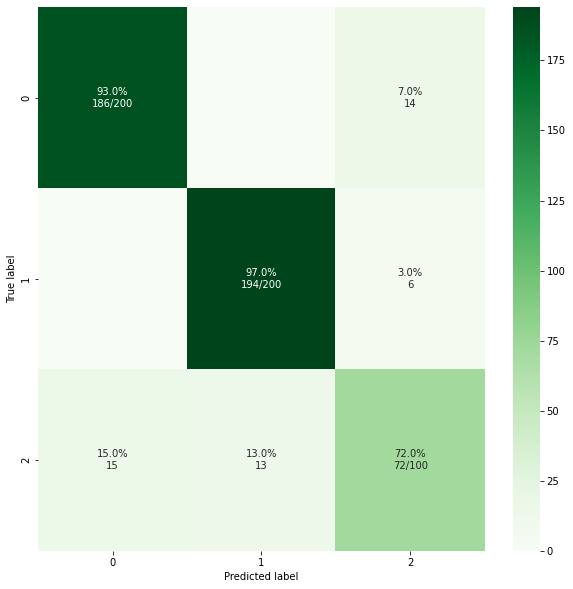

In [41]:
cm_analysis(y_true, y_pred, os.path.join(input_path, 'test.png'),
            labels = None, ymap=None, figsize=(10,10))

## Classification report for the best parameter

In [42]:
label = ['5C', '5mC', '5hmC']
report = classification_report(y_true, y_pred, target_names = label, digits = 4, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
5C,0.925373,0.930000,0.927681,200.000
5mC,0.937198,0.970000,0.953317,200.000
5hmC,0.782609,0.720000,0.750000,100.000
accuracy,0.904000,0.904000,0.904000,0.904
macro avg,0.881727,0.873333,0.876999,500.000
weighted avg,0.901550,0.904000,0.902399,500.000
